# Practica 5

In [53]:
from deap import creator, tools, base, algorithms
import numpy as np
import random


class Tren:
    def __init__(self, numero_vagones, operacion, matricula):
        self.numero_vagones = numero_vagones
        self.operacion = operacion
        self.matricula = matricula

    def __str__(self):
        return "Número de vagones: " + str(self.numero_vagones) + "\n" + \
        "Muelle de operaciones: " + str(self.operacion) + "\n" + \
                "Matrícula: " + str(self.matricula) + "\n"

    


def producir_lista_trenes_aleatoria(n, min_vagones, max_vagones):
    lista_trenes = []
    for i in range(n):
        numero_vagones = random.randint(min_vagones, max_vagones)
        operacion = random.choice(["gas", "carbón", "contenedores"])
        lista_trenes.append(Tren(numero_vagones, operacion, i))
    return lista_trenes


def crear_cola_de_trenes(lista_de_trenes):
    auxiliar = lista_de_trenes
    random.shuffle(auxiliar)
    return auxiliar


class Cola_de_trenes(list):
    def __init__(self, lista_de_trenes):
        list.extend(self,crear_cola_de_trenes(lista_de_trenes))

    def __str__(self):
        cadena = ""
        for i in list(self):
            cadena += (str(i) + "\n")
        return cadena
    

random.seed(2024)
lista_de_trenes = producir_lista_trenes_aleatoria(50, 10, 30)


cola_de_trenes = Cola_de_trenes(lista_de_trenes)

In [54]:
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))

creator.create("Individual", Cola_de_trenes, fitness=creator.FitnessMin)

C:\Users\Usuario\PycharmProjects\vent\Lib\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
C:\Users\Usuario\PycharmProjects\vent\Lib\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


In [55]:
toolbox = base.Toolbox()

# Crear individuos
toolbox.register("individual", creator.Individual, producir_lista_trenes_aleatoria(50, 10, 30))
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

In [56]:

def tiempo_total(indiv):
    sum = 0 
    for tren in indiv:
        sum += tren.numero_vagones

    return sum



def evaluar_cola(individuo):
    
    muelle_gas = 1
    muelle_carbon = 1
    muelle_contenedores = 1
    id_tren = 0

    
    for i in range(tiempo_total(individuo)):
        muelle_gas -= 1
        muelle_carbon -= 1
        muelle_contenedores -= 1
        
        if id_tren >= len(individuo) and muelle_carbon <= 0 and muelle_contenedores <= 0 and muelle_gas <= 0:
            break
        
        for _ in range(3):
            
            if id_tren >= len(individuo):
                break

            if individuo[id_tren].operacion == "carbón" and muelle_carbon <= 0:
                muelle_carbon = individuo[id_tren].numero_vagones
                id_tren += 1
                continue
            if individuo[id_tren].operacion == "contenedores" and muelle_contenedores <= 0:
                muelle_contenedores = individuo[id_tren].numero_vagones
                id_tren += 1
                continue
                
            if individuo[id_tren].operacion == "gas" and muelle_gas <= 0:
                muelle_gas = individuo[id_tren].numero_vagones
                id_tren += 1
                continue

        continue
    return i,


In [64]:
def train_swap(indivuduo, indpb):
    if random.random() < indpb:
        pos1 = random.randint(0, len(indivuduo) - 1)
        pos2 = random.randint(0, len(indivuduo) - 1)
        
        train1 = indivuduo[pos1]
        train2 = indivuduo[pos2]
        indivuduo[pos1] = train2
        indivuduo[pos2] = train1
        
    return indivuduo,
        
        
        

In [ ]:
# Funcion de cruce

In [70]:
toolbox.register("evaluate", evaluar_cola)
toolbox.register("select", tools.selTournament, tournsize=3)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", train_swap, indpb=0.03)

In [71]:
ranking = tools.HallOfFame(5)
estadisticas = tools.Statistics(lambda indiv: indiv.fitness.values)
estadisticas.register("promedio", np.mean)
estadisticas.register("max", np.max)
estadisticas.register("min", np.min)

In [75]:
poblacion = toolbox.population(n=1000)
pop, logbook = algorithms.eaSimple(poblacion, toolbox, cxpb=0.5, mutpb=0.2, ngen=35, stats=estadisticas, halloffame=ranking, verbose=True)

gen	nevals	promedio	max	min
0  	1000  	549.281 	685	448
1  	598   	517.386 	629	423
2  	623   	493.551 	590	401
3  	590   	474.077 	559	408
4  	590   	457.211 	534	385
5  	603   	442.62  	514	370
6  	559   	428.436 	501	366
7  	581   	416.214 	491	360
8  	629   	405.299 	463	359
9  	642   	394.056 	465	342
10 	614   	383.68  	463	331
11 	572   	374.31  	432	321
12 	615   	366.252 	422	320
13 	596   	358.177 	419	320
14 	609   	349.339 	401	307
15 	619   	341.582 	393	301
16 	611   	334.609 	383	299
17 	614   	328.347 	390	299
18 	631   	321.802 	374	285
19 	600   	316.372 	372	281
20 	579   	309.616 	355	281
21 	626   	304.14  	355	278
22 	612   	298.445 	356	276
23 	583   	292.446 	339	274
24 	572   	288.058 	319	267
25 	621   	284.252 	318	266
26 	563   	280.008 	312	266
27 	580   	277.024 	313	259
28 	609   	273.733 	297	259
29 	585   	270.622 	298	255
30 	592   	267.655 	309	254
31 	579   	264.838 	296	251
32 	629   	261.94  	295	246
33 	594   	259.271 	287	246
34 	593   	256.914 	

In [76]:
print(f'El mejor individuo es \n {ranking[0]} con aptitud {ranking[0].fitness}')

El mejor individuo es 
 Número de vagones: 11
Muelle de operaciones: gas
Matrícula: 10

Número de vagones: 16
Muelle de operaciones: contenedores
Matrícula: 14

Número de vagones: 13
Muelle de operaciones: carbón
Matrícula: 8

Número de vagones: 15
Muelle de operaciones: carbón
Matrícula: 26

Número de vagones: 10
Muelle de operaciones: gas
Matrícula: 30

Número de vagones: 13
Muelle de operaciones: contenedores
Matrícula: 1

Número de vagones: 11
Muelle de operaciones: gas
Matrícula: 10

Número de vagones: 16
Muelle de operaciones: carbón
Matrícula: 20

Número de vagones: 14
Muelle de operaciones: contenedores
Matrícula: 0

Número de vagones: 11
Muelle de operaciones: gas
Matrícula: 10

Número de vagones: 14
Muelle de operaciones: contenedores
Matrícula: 0

Número de vagones: 15
Muelle de operaciones: carbón
Matrícula: 24

Número de vagones: 11
Muelle de operaciones: gas
Matrícula: 10

Número de vagones: 20
Muelle de operaciones: contenedores
Matrícula: 29

Número de vagones: 10
Muell

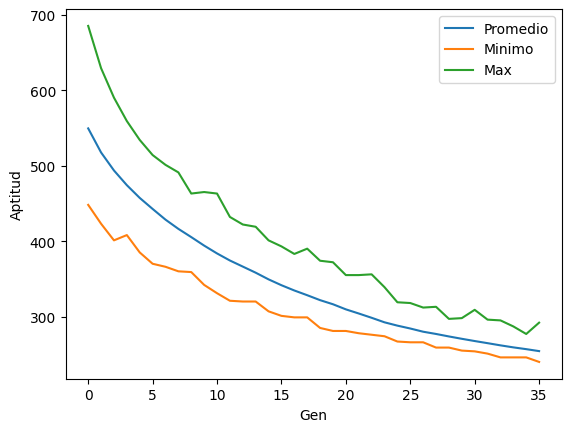

In [77]:
import matplotlib.pyplot as plt


gen, prom, min, max = logbook.select("gen", "promedio", "min", "max")

plt.plot(gen, prom, label="Promedio")
plt.plot(gen, min, label="Minimo")
plt.plot(gen, max, label="Max")
plt.xlabel("Gen")
plt.ylabel("Aptitud")
plt.legend(loc="upper right")
plt.show()